<a href="https://colab.research.google.com/github/nicholashagemann/DS-Assignment-Submission-Practice-Repository/blob/master/LS_DS_Unit_4_Sprint_Challenge_2_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** 

- **Input Layer:** 

- **Hidden Layer:** 

- **Output Layer:**

- **Activation:** 

1. Neurons are the type of cells that make up our brains, and brains generally. They are responsible for receiving and sending signals, creating chains of propagating information. Since neurons are the mechanism behind our thoughts, a neural net seeks to emulate that network onto a machine, hopefully resulting in machine learning. 

2. An input layer in a neural network is akin to sensory neurons in the brain. These neurons are the primary source for outside information, which they relay to the rest of the neurons in the network. In neural nets, there are no activation functions in this first layer as it is merely responsible for relaying the sensory information (data) to the first hidden layer.

3. The hidden layers in a neural network are akin to the vast array of neurons that signals pass through in our brains before reaching the final output layer which sends a motor signal. In neural nets, these layers are responsible for processing and transforming the information from the previous layer, with each layer iterating upon the previous layer's attempt at classification or regression.

4. The output layer in a neural network is akin to the motor neurons in the brain, which is the final layer of neurons responsible for sending signals to the rest of the body. For neural networks this is the layer which will spit out the final analysis of the data: for a classification problem, there will be a number of nodes corresponding to the number of classes and the node with the highest probability of being activated will be the determined class; for a regression problem, there will be one output node which will return the model's guess. 

5. In actual neurons, activations is accomplished by the creation of a sufficiently large ionic gradient to cause hyperpolarization within the neuron and cause it to fire. For neural networks, we model this by using different mathematical functions to determine whether the neuron 'fires' or not. Whether or not this occurs depends on the information the neuron has received, as well as the weights and biases in the model (which is why we use backpropagation to get the weights and biases that result in the smallest loss function). These functions are responsible for the information the next layer receives. 

- `Explain` how Back-propagation works 
- `Explain` how Gradient Descent works (mention the learning rate)
- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

1. Backpropagation is essentially multiple iterations over the same neural networks while changing the weights for each neuron and bias for each layer. This change occurs through Gradient Descent, which functions by taking the gradient of the loss function of the final output and subtracting it from the initial weights and bias to find the new weights and bias. It must be subtracted because we want to move down the gradient in order to find the minimum of the loss function, which will give us the model its greatest accuracy. We can make several adjustments to the gradient descent, like giving it momentum so it is less likely to get stuck in a local minimum (the momentum would carry it out of the 'hole' of the local minimum and over the 'hill' to hopefully find the global minimum), or regularizing it so it doesn't overfit to the training data and will thus be more accurate for new data. 

Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

Our inputs are the training data, which send that information to the first hidden layer. The first hidden layer transforms the data by calculating the dot product of the weights and the data, and adds a bias term. The result is then given to an activation function like the sigmoid function - for the sigmoid function, if the result is positive the function will predict a 1, and if the result is negative it will predict a 0, assuming the threshold is set to 0.5. This information is then sent to the next hidden layer, which performs the same operation, using a different set of weights and biases. Eventually the signal will reach the output layer, where the activation is ideally changed to a softmax function to give normalized exponential probabilities of each class (assuming it's a classification problem).

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [93]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [94]:
X.shape

(300, 2)

In [95]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [96]:
2**2

4

In [97]:
4**4

256

This word is speled wrong. 

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [98]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model

# YOUR CODE HERE
# create a sequential model with no hidden layers and a single binary output layer
model1 = Sequential()

model1.add(Dense(1, activation='sigmoid', input_dim = 2))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# run the model on the test data with 10 epochs and a 20% validation split
h1 = model1.fit(X, y, epochs=10, validation_split=0.2, verbose=True)

Epoch 1/10
8/8 [==============================] - 0s 18ms/step - loss: 0.6946 - accuracy: 0.5833 - val_loss: 0.7477 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5833 - val_loss: 0.7469 - val_accuracy: 0.5167
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.5833 - val_loss: 0.7463 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5917 - val_loss: 0.7456 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5958 - val_loss: 0.7451 - val_accuracy: 0.5167
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5958 - val_loss: 0.7442 - val_accuracy: 0.5167
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5958 - val_loss: 0.7436 - val_accuracy: 0.5167
Epoch 8/10
8/8 [=================

In [99]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [100]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'name': 'dense_64_input',
   'ragged': False,
   'sparse': False}},
 {'class_name': 'Dense',
  'config': {'activation': 'sigmoid',
   'activity_regularizer': None,
   'batch_input_shape': (None, 2),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_64',
   'trainable': True,
   'units': 1,
   'use_bias': True}}]

In [101]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [102]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [103]:
# build and fit model

# make a new model with 2 hidden layers each with 7 neurons and using relu as the activation function
model2 = Sequential()

model2.add(Dense(7, activation='relu', input_dim = 2))

model2.add(Dense(7, activation='relu'))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# run the model on 100 epochs with the callback included
h2 = model2.fit(X, y, epochs=100, validation_split=0.2, verbose=True, callbacks=myCallback())

Epoch 1/100
8/8 [==============================] - 1s 21ms/step - loss: 0.7006 - accuracy: 0.7375 - val_loss: 0.7001 - val_accuracy: 0.7667
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.7500 - val_loss: 0.6919 - val_accuracy: 0.7667
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.7500 - val_loss: 0.6847 - val_accuracy: 0.7667
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6760 - accuracy: 0.7500 - val_loss: 0.6791 - val_accuracy: 0.7667
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6700 - accuracy: 0.7500 - val_loss: 0.6746 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6640 - accuracy: 0.7458 - val_loss: 0.6699 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6588 - accuracy: 0.7417 - val_loss: 0.6649 - val_accuracy: 0.7667
Epoch 8/100
8/8 [=========

In [104]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [105]:
# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [106]:
!pip install mlxtend

In [107]:
X.shape, y.shape

((300, 2), (300,))

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


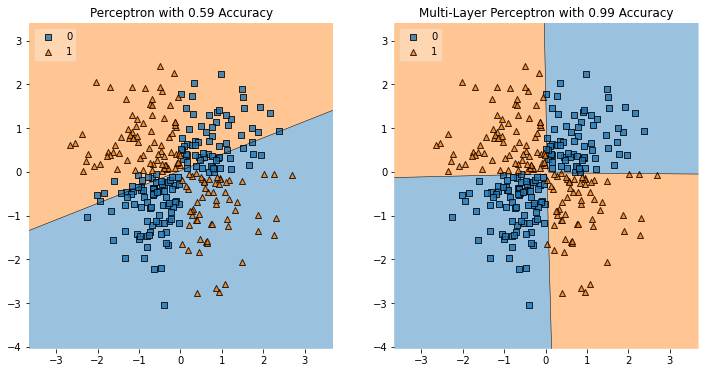

In [108]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

In [109]:
# pretty much exactly what we did in the first day

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

1. We don't have any hidden layers so it does a linear fit, which for this classification (very similar to XOR problem from lecture) will result in an accuracy of 50%.

2. The hidden layers allow more than one dimension of fitting, resulting in the model being able to categorize the data into 4 quadrants instead of 2.

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1


In [111]:
# Create an input matrix named 'X' store it in a 2D numpy array

# Create an output vector for the labels named 'Y', store it in 1D numpy array

# create our training data
target = 'target'
Y = df[target]
X = df.drop(columns=target)
print(f'Shape of X: {X.shape}, shape of y: {y.shape}')

Shape of X: (303, 13), shape of y: (300,)


In [112]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [113]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [114]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier

# my function is compact and allows for a lot of hyperparameter tuning
# units are how many neurons in each hidden layer
# layers are how many hidden layers there are 
# act_fn is what activation function each
def create_model(units=10, layers=3, act_fn='relu', opt='adam', out_fn='sigmoid'):
  '''my function is compact and allows for a lot of hyperparameter tuning
  units are how many neurons in each hidden layer
  layers are how many hidden layers there are 
  act_fn is what activation function each
  opt is what optimizer to use
  out_fn is what activation function to use on the output layer'''
  model = Sequential()

  for layer in range(layers):
    model.add(Dense(units, activation=act_fn, input_dim = 13))

  model.add(Dense(1, activation=out_fn))

  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [115]:
create_model().__module__

'keras.engine.sequential'

In [116]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
# YOUR CODE HERE
model = KerasClassifier(build_fn=create_model)

In [117]:
model.__module__

'keras.wrappers.scikit_learn'

In [118]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 

# YOUR CODE HERE
param_grid = {'units': [10, 15],
              'opt': ['adam', 'rmsprop']}

In [119]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [120]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
# YOUR CODE HERE
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=2, cv=3)
grid_result = gs.fit(X, Y)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   11.4s finished


10/10 [==============================] - 1s 3ms/step - loss: 1.1311 - accuracy: 0.6172


In [121]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.5874587496121725 using {'opt': 'rmsprop', 'units': 15}
Means: 0.455445537964503, Stdev: 0.02914773044254022 with: {'opt': 'adam', 'units': 10}
Means: 0.46204620599746704, Stdev: 0.09369682679210607 with: {'opt': 'adam', 'units': 15}
Means: 0.4785478512446086, Stdev: 0.06875468259929249 with: {'opt': 'rmsprop', 'units': 10}
Means: 0.5874587496121725, Stdev: 0.024697401133156067 with: {'opt': 'rmsprop', 'units': 15}
